In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [27]:
iris = load_iris()
data = iris.data
target = iris.target

In [28]:
# Стандартизация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

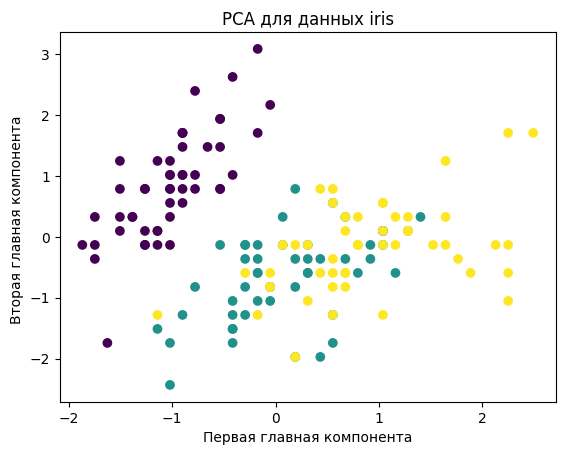

In [29]:
# Рисуем график
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=target, cmap='viridis')
plt.title('PCA для данных iris')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента ')
plt.show()

In [30]:
# Применяем PCA
pca = PCA(n_components=2) # Хотим 2 главные компоненты
data_pca = pca.fit_transform(data_scaled) # Преобразуем данные

print("Первые 5 строк данных после PCA:")
print(data_pca[:5])
print("Доля объясненной дисперсии:", pca.explained_variance_ratio_)

Первые 5 строк данных после PCA:
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]
Доля объясненной дисперсии: [0.72962445 0.22850762]


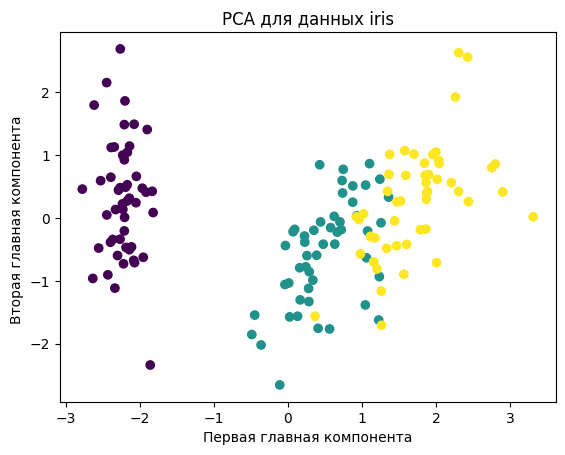

In [31]:
# Рисуем график
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis')
plt.title('PCA для данных iris')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента ')
plt.show()

In [32]:
# Применение K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=17)
clusters = kmeans.fit_predict(data_pca)

print("Первые 5 меток кластеров:", clusters[:5])

Первые 5 меток кластеров: [0 0 0 0 0]


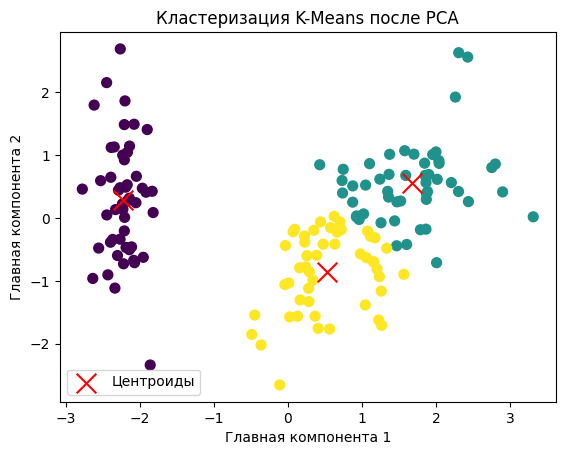

In [33]:
# Визуализация
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='x', label='Центроиды')
plt.title("Кластеризация K-Means после PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.legend()
plt.show()